# Predict Customer Churn

## Problem statement: Predict customer churn based on customer's and team's activity.

In [1]:
import numpy as np
import pandas as pd

In [2]:
mt_activity = pd.read_csv("C:\data\mt_activity.csv")

In [3]:
licenses_paid = pd.read_csv("C:\data\licenses_paid.csv")

In [4]:
mt_activity[mt_activity.isna()['team_id']]

,event_date,person_id,user_id,team_id,projects_created,tasks_created,checklists_created,agenda_events,timeline_events,reports_opened,reports_saved,invitations_sent,invitations_claimed,project_groups_created
4948436,2021-08-06,75495908,71388102,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5632804,2021-07-30,75495908,71388102,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
licenses_paid[licenses_paid.isna()['team_id']]

,team_id,plan,duration,quantity,license_start,license_end
110426,NaN,pro12,12,12.0,2022-03-13,2023-03-12


In [6]:
mt_activity.isna()['team_id'].value_counts()

False    15455116
True            2
Name: team_id, dtype: int64

In [7]:
mt_activity.dropna(subset=['team_id'], inplace=True)  #get rid of rows with team_id equal to NaN

In [8]:
mt_activity.isna()['team_id'].value_counts()

False    15455116
Name: team_id, dtype: int64

In [9]:
licenses_paid.isna()['team_id'].value_counts()

False    131620
True          1
Name: team_id, dtype: int64

In [10]:
licenses_paid.dropna(subset=['team_id'], inplace=True)  #get rid of rows with team_id equal to NaN

In [11]:
licenses_paid.isna()['team_id'].value_counts()

False    131620
Name: team_id, dtype: int64

In [12]:
df = pd.merge(mt_activity, licenses_paid, how="inner", on="team_id")  #inner join of two tables

In [13]:
df.shape

(24751361, 19)

In [14]:
del mt_activity, licenses_paid  #enforce garbage collection to gain memory resource.

In [15]:
missing_props = df.isna().mean(axis=0)

In [16]:
missing_props.sort_values(ascending=False)

invitations_claimed       0.999481
reports_saved             0.998946
project_groups_created    0.995623
invitations_sent          0.992288
timeline_events           0.984867
reports_opened            0.976929
projects_created          0.960852
agenda_events             0.909770
checklists_created        0.684436
tasks_created             0.410474
quantity                  0.000345
plan                      0.000000
license_start             0.000000
duration                  0.000000
event_date                0.000000
person_id                 0.000000
team_id                   0.000000
user_id                   0.000000
license_end               0.000000
dtype: float64

In [17]:
over_threshold = missing_props[missing_props >= 0.4]  #missing values greater equal than 40% will be identified.

In [18]:
over_threshold.sort_values(ascending=False)

invitations_claimed       0.999481
reports_saved             0.998946
project_groups_created    0.995623
invitations_sent          0.992288
timeline_events           0.984867
reports_opened            0.976929
projects_created          0.960852
agenda_events             0.909770
checklists_created        0.684436
tasks_created             0.410474
dtype: float64

In [19]:
df.drop(over_threshold.index, axis=1, inplace=True)  #drop columns with missing values greater than 40%.

In [20]:
df.isna().mean(axis=0)  #only the column quantity has missing values

event_date       0.000000
person_id        0.000000
user_id          0.000000
team_id          0.000000
plan             0.000000
duration         0.000000
quantity         0.000345
license_start    0.000000
license_end      0.000000
dtype: float64

In [21]:
df.dropna(inplace=True)  #delete rows with missing values

In [22]:
df.isna().mean(axis=0)   #no missing values

event_date       0.0
person_id        0.0
user_id          0.0
team_id          0.0
plan             0.0
duration         0.0
quantity         0.0
license_start    0.0
license_end      0.0
dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24742831 entries, 0 to 24751360
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_date     object 
 1   person_id      int64  
 2   user_id        int64  
 3   team_id        float64
 4   plan           object 
 5   duration       int64  
 6   quantity       float64
 7   license_start  object 
 8   license_end    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.8+ GB


In [24]:
df["event_date"] = pd.to_datetime(df["event_date"],   #convert type for this variable from object into datetime
 format = '%Y-%m-%dT', 
 errors = 'coerce')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24742831 entries, 0 to 24751360
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_date     datetime64[ns]
 1   person_id      int64         
 2   user_id        int64         
 3   team_id        float64       
 4   plan           object        
 5   duration       int64         
 6   quantity       float64       
 7   license_start  object        
 8   license_end    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.8+ GB


In [26]:
df["license_start"] = pd.to_datetime(df["license_start"],   #convert type for this variable from object into datetime
 format = '%Y-%m-%dT', 
 errors = 'coerce')

In [27]:
df["license_end"] = pd.to_datetime(df["license_end"],   #convert type for this variable from object into datetime
 format = '%Y-%m-%dT', 
 errors = 'coerce')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24742831 entries, 0 to 24751360
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_date     datetime64[ns]
 1   person_id      int64         
 2   user_id        int64         
 3   team_id        float64       
 4   plan           object        
 5   duration       int64         
 6   quantity       float64       
 7   license_start  datetime64[ns]
 8   license_end    datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(1)
memory usage: 1.8+ GB


In [ ]:
#decompose datetime features into their components.

In [29]:
df['event_date_year'] = df['event_date'].dt.year
df['event_date_month'] = df['event_date'].dt.month
df['event_date_day'] = df['event_date'].dt.day

In [30]:
df['license_start_year'] = df['license_start'].dt.year
df['license_start_month'] = df['license_start'].dt.month
df['license_start_day'] = df['license_start'].dt.day

In [31]:
df['license_end_year'] = df['license_end'].dt.year
df['license_end_month'] = df['license_end'].dt.month
df['license_end_day'] = df['license_end'].dt.day

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24742831 entries, 0 to 24751360
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   event_date           datetime64[ns]
 1   person_id            int64         
 2   user_id              int64         
 3   team_id              float64       
 4   plan                 object        
 5   duration             int64         
 6   quantity             float64       
 7   license_start        datetime64[ns]
 8   license_end          datetime64[ns]
 9   event_date_year      int64         
 10  event_date_month     int64         
 11  event_date_day       int64         
 12  license_start_year   int64         
 13  license_start_month  int64         
 14  license_start_day    int64         
 15  license_end_year     int64         
 16  license_end_month    int64         
 17  license_end_day      int64         
dtypes: datetime64[ns](3), float64(2), int64(12), object(1)
memor

In [33]:
df.head()

,event_date,person_id,user_id,team_id,plan,duration,quantity,license_start,license_end,event_date_year,event_date_month,event_date_day,license_start_year,license_start_month,license_start_day,license_end_year,license_end_month,license_end_day
0,2021-01-27,54812520,50597125,50664030.0,pro12,12,1.0,2020-09-01,2021-08-31,2021,1,27,2020,9,1,2021,8,31
1,2021-01-27,54812520,50597125,50664030.0,pro12,12,1.0,2021-08-31,2022-08-31,2021,1,27,2021,8,31,2022,8,31
2,2021-07-05,54812520,50597125,50664030.0,pro12,12,1.0,2020-09-01,2021-08-31,2021,7,5,2020,9,1,2021,8,31
3,2021-07-05,54812520,50597125,50664030.0,pro12,12,1.0,2021-08-31,2022-08-31,2021,7,5,2021,8,31,2022,8,31
4,2022-03-02,54812520,50597125,50664030.0,pro12,12,1.0,2020-09-01,2021-08-31,2022,3,2,2020,9,1,2021,8,31


In [34]:
df.drop(["event_date", "license_start", "license_end"], axis = 1, inplace = True)  #delete datatime variables

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24742831 entries, 0 to 24751360
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   person_id            int64  
 1   user_id              int64  
 2   team_id              float64
 3   plan                 object 
 4   duration             int64  
 5   quantity             float64
 6   event_date_year      int64  
 7   event_date_month     int64  
 8   event_date_day       int64  
 9   license_start_year   int64  
 10  license_start_month  int64  
 11  license_start_day    int64  
 12  license_end_year     int64  
 13  license_end_month    int64  
 14  license_end_day      int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 2.9+ GB


In [36]:
df.groupby("license_start_year").size()

license_start_year
2016         335
2018         305
2019      124985
2020     2859595
2021    16066497
2022     5691114
dtype: int64

In [37]:
df.groupby("license_end_year").size()

license_end_year
2021    15212527
2022     8171090
2023     1213477
2024      142744
2025        2993
dtype: int64

In [38]:
df.head()

,person_id,user_id,team_id,plan,duration,quantity,event_date_year,event_date_month,event_date_day,license_start_year,license_start_month,license_start_day,license_end_year,license_end_month,license_end_day
0,54812520,50597125,50664030.0,pro12,12,1.0,2021,1,27,2020,9,1,2021,8,31
1,54812520,50597125,50664030.0,pro12,12,1.0,2021,1,27,2021,8,31,2022,8,31
2,54812520,50597125,50664030.0,pro12,12,1.0,2021,7,5,2020,9,1,2021,8,31
3,54812520,50597125,50664030.0,pro12,12,1.0,2021,7,5,2021,8,31,2022,8,31
4,54812520,50597125,50664030.0,pro12,12,1.0,2022,3,2,2020,9,1,2021,8,31


In [39]:
df["plan"].value_counts()  #number of occurrences for each categorical value

pro1            9478152
pro12           6930113
business12      3432131
business1       3100197
business36       854778
edu12            400067
business24       159101
business18       140728
enterprise12      63601
pro6              60949
business6         29771
academic12        22623
academic1         12665
pro36             11763
edu36              8983
pro24              8321
edu60              6686
business3          6140
pro3               5449
enterprise36       3375
pro18              3282
edu3               1917
edu6               1666
edu24               373
Name: plan, dtype: int64

In [ ]:
#categorical variable will be replaced by one hot encoding; the encoding preserves the relationships between category values.

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
ohe = OneHotEncoder()

In [42]:
transformed = ohe.fit_transform(df[['plan']])

In [43]:
transformed.toarray().shape

(24742831, 24)

In [44]:
transformed.toarray()[0]  #one hot encoding for the categorical value "pro12" (see also next line).

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0.])

In [45]:
df.iloc[0]["plan"]

'pro12'

In [46]:
ohe.categories_[0]  #categorical values for the categorical variable "plan"

array(['academic1', 'academic12', 'business1', 'business12', 'business18',
       'business24', 'business3', 'business36', 'business6', 'edu12',
       'edu24', 'edu3', 'edu36', 'edu6', 'edu60', 'enterprise12',
       'enterprise36', 'pro1', 'pro12', 'pro18', 'pro24', 'pro3', 'pro36',
       'pro6'], dtype=object)

In [47]:
ohe.categories_[0].shape

(24,)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24742831 entries, 0 to 24751360
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   person_id            int64  
 1   user_id              int64  
 2   team_id              float64
 3   plan                 object 
 4   duration             int64  
 5   quantity             float64
 6   event_date_year      int64  
 7   event_date_month     int64  
 8   event_date_day       int64  
 9   license_start_year   int64  
 10  license_start_month  int64  
 11  license_start_day    int64  
 12  license_end_year     int64  
 13  license_end_month    int64  
 14  license_end_day      int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 2.9+ GB


In [49]:
df[ohe.categories_[0]] = transformed.toarray()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24742831 entries, 0 to 24751360
Data columns (total 39 columns):
 #   Column               Dtype  
---  ------               -----  
 0   person_id            int64  
 1   user_id              int64  
 2   team_id              float64
 3   plan                 object 
 4   duration             int64  
 5   quantity             float64
 6   event_date_year      int64  
 7   event_date_month     int64  
 8   event_date_day       int64  
 9   license_start_year   int64  
 10  license_start_month  int64  
 11  license_start_day    int64  
 12  license_end_year     int64  
 13  license_end_month    int64  
 14  license_end_day      int64  
 15  academic1            float64
 16  academic12           float64
 17  business1            float64
 18  business12           float64
 19  business18           float64
 20  business24           float64
 21  business3            float64
 22  business36           float64
 23  business6            float64
 

In [51]:
df.drop(["plan"], axis = 1, inplace = True)  #delete categorical variable

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24742831 entries, 0 to 24751360
Data columns (total 38 columns):
 #   Column               Dtype  
---  ------               -----  
 0   person_id            int64  
 1   user_id              int64  
 2   team_id              float64
 3   duration             int64  
 4   quantity             float64
 5   event_date_year      int64  
 6   event_date_month     int64  
 7   event_date_day       int64  
 8   license_start_year   int64  
 9   license_start_month  int64  
 10  license_start_day    int64  
 11  license_end_year     int64  
 12  license_end_month    int64  
 13  license_end_day      int64  
 14  academic1            float64
 15  academic12           float64
 16  business1            float64
 17  business12           float64
 18  business18           float64
 19  business24           float64
 20  business3            float64
 21  business36           float64
 22  business6            float64
 23  edu12                float64
 

In [53]:
df = df.sample(n = len(df), random_state = 42)  #shuffle the dataset

In [54]:
df = df.reset_index(drop = True)

In [55]:
df_test = df.sample(frac = 0.25, random_state = 42)  #keep aside 25% for the test set

In [56]:
df_train = df.drop(df_test.index)  #keep aside 75% for the training set

In [57]:
del df, ohe, transformed  #enforce garbage collection to gain memory resource.

In [58]:
X_train = df_train.drop(["duration"], axis = 1).values

In [59]:
X_test = df_test.drop(["duration"], axis = 1).values

In [60]:
y_train = df_train["duration"].values

In [61]:
y_test = df_test["duration"].values

In [62]:
del df_train, df_test  #enforce garbage collection to gain memory resource.

## training the model

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#ad hoc hyperparaneter chosen; next steps: streamline preparation steps, create input pipeline and grid search for the best parameters

In [131]:
rf = RandomForestRegressor(max_depth=2, n_estimators=20, random_state = 42, verbose=2)

In [132]:
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 28.4min finished


RandomForestRegressor(max_depth=2, n_estimators=20, random_state=42, verbose=2)

In [133]:
score = rf.score(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   13.9s finished


In [ ]:
#r-squared of 76% reveals that 76% of the variability observed in the target variable is explained by the regression model.
#generally, a higher r-squared indicates more variability explained by the model.

In [134]:
print("R-squared:", score)

R-squared: 0.7589941382414015


In [135]:
y_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.2s finished


In [136]:
from sklearn.metrics import mean_squared_error

In [137]:
mse = mean_squared_error(y_test, y_pred)

In [138]:
rmse = np.sqrt(mse); rmse

3.8798522282581134

In [ ]:
#RMSE (root mean squared error) lies with a probability of 95% within the confidence interval provided below.

In [139]:
from scipy import stats
confidence = 0.95
squared_errors = (y_pred - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_error)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([3.87424977, 3.88544661])

In [140]:
import matplotlib.pyplot as plt

In [ ]:
#note: it can be clearly seen that the difference between original and predicted is roughly RMSE

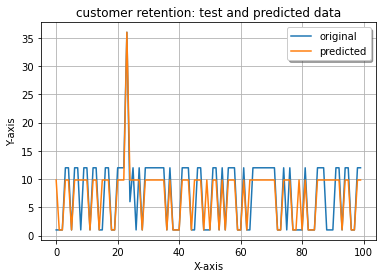

In [147]:
x_ax = range(len(y_test[:100]))
plt.plot(x_ax, y_test[:100], label="original")
plt.plot(x_ax, y_pred[:100], label="predicted")
plt.title("customer retention: test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)

## conclusion

For a new customer with a given history track record the predicted duration may have an error of roughly 4 month.